# Some regression examples

In [1]:
#%load_ext watermark
%reload_ext watermark

%watermark -v -d -a "David Torres Pascual" -p numpy,pandas,matplotlib,sklearn

David Torres Pascual 2016-10-13 

CPython 3.5.2
IPython 4.2.0

numpy 1.11.1
pandas 0.18.1
matplotlib 1.5.1
sklearn 0.18


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

from sklearn import linear_model, svm, ensemble
from sklearn import preprocessing, cross_validation, metrics

C:\Users\david\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
url = 'housingdata.csv'
columnas = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv(url, 
                 sep='\s+', 
                 names=columnas)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
variables = df.columns
pred = variables[ :-1]
targ =  variables[-1]

In [5]:
scaler = preprocessing.StandardScaler()
Xsc = scaler.fit_transform( df[ pred ] )
y = df[targ]

In [6]:
ttsplit = cross_validation.train_test_split

poly = preprocessing.PolynomialFeatures(2)
Xpol = poly.fit_transform(Xsc)

X_train, X_test, y_train, y_test = ttsplit(Xpol, y, test_size = .2, random_state = 12)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

(404, 105) (102, 105) (404,) (102,)


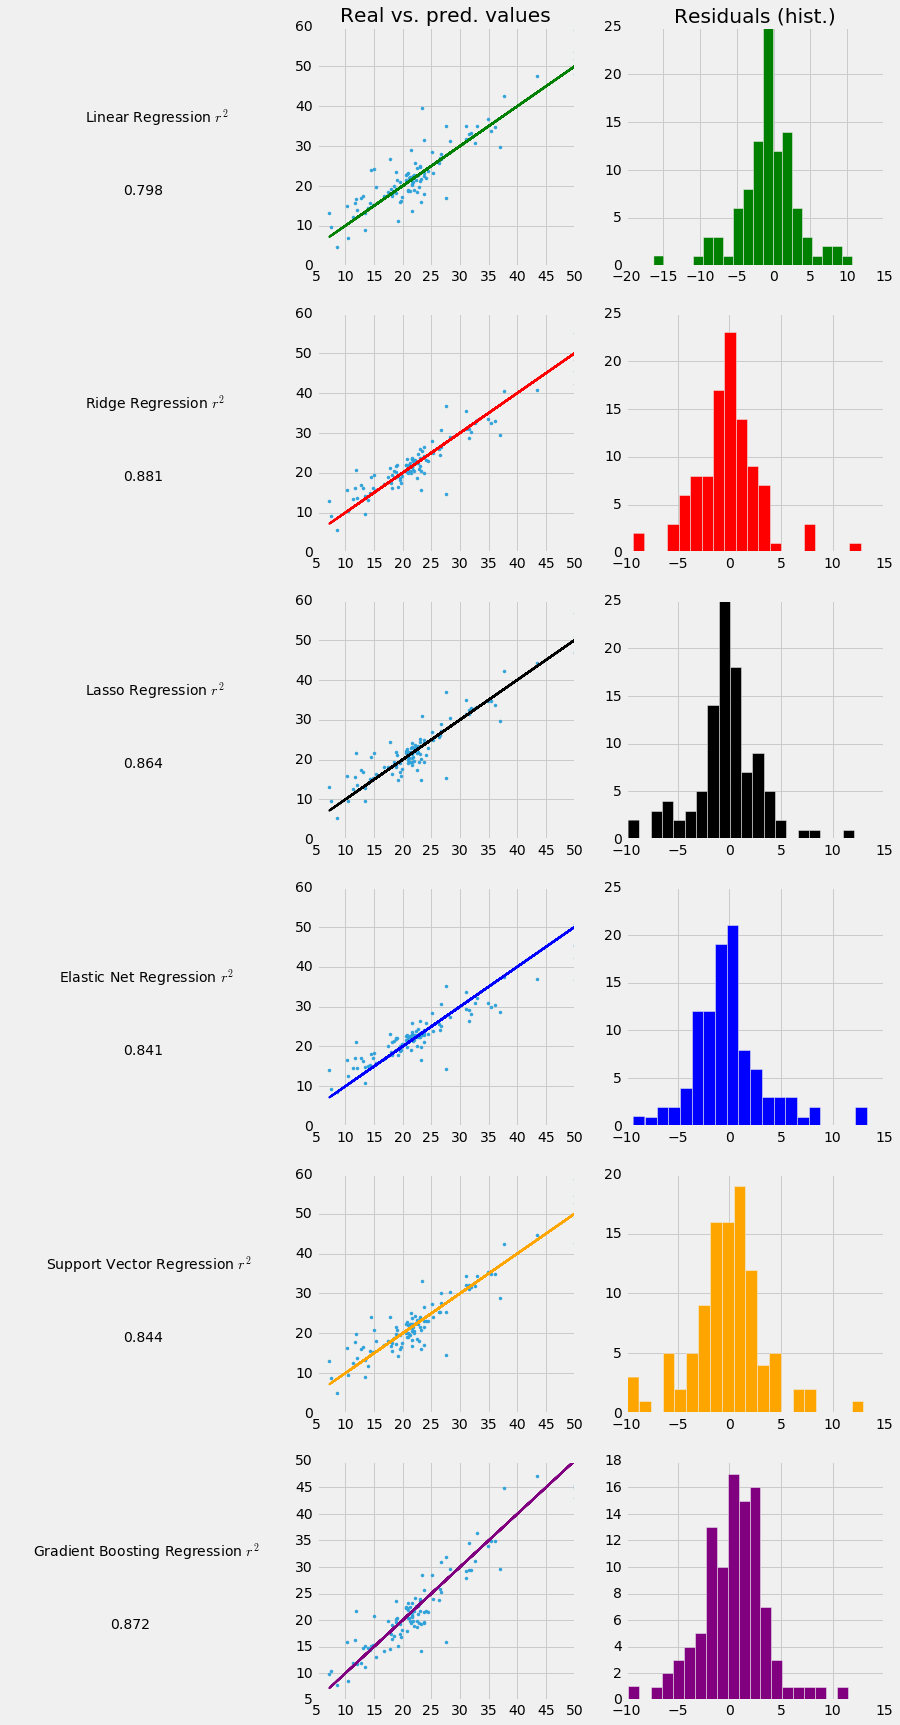

In [8]:
r2_score = metrics.r2_score

linr =  linear_model.LinearRegression()
linr.fit(X_train, y_train) 
linr_yPred = linr.predict(X_test).clip(0, np.inf)
r2_linr = r2_score(y_test, linr_yPred).round(3)

ridr = linear_model.Ridge(alpha=100.)
ridr.fit(X_train, y_train) 
ridr_yPred = ridr.predict(X_test).clip(0, np.inf)
r2_ridr = r2_score(y_test, ridr_yPred).round(3)

lasso = linear_model.Lasso(alpha=.05, fit_intercept=True, max_iter=1000)
lasso.fit(X_train, y_train) 
lasso_yPred = lasso.predict(X_test).clip(0, np.inf)
r2_lasso = r2_score(y_test, lasso_yPred).round(3)

elar = linear_model.ElasticNet(l1_ratio=0.1)
elar.fit(X_train, y_train) 
elar_yPred = elar.predict(X_test).clip(0, np.inf)
r2_elar = r2_score(y_test, elar_yPred).round(3)

svr = svm.LinearSVR()
svr.fit(X_train, y_train) 
svr_yPred = svr.predict(X_test).clip(0, np.inf)
r2_svr = r2_score(y_test, svr_yPred).round(3)

ens = ensemble.GradientBoostingRegressor(alpha=.9,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9, random_state=12)
ens.fit(X_train, y_train) 
ens_yPred = ens.predict(X_test).clip(0, np.inf)
r2_ens = r2_score(y_test, ens_yPred).round(3)

plt.figure( figsize = (14, 28) )

plt.subplot(6, 3, 1)
plt.text(.3,.6,'Linear Regression $r^{2}$')
plt.text(.45,.3, r2_linr)
plt.xticks(())
plt.yticks(())
plt.subplot(6, 3, 2)
plt.plot(y_test, linr_yPred, '.', y_test, y_test, 'green', linewidth=2.0)
plt.title('Real vs. pred. values')
plt.subplot(6, 3, 3)
plt.hist(y_test-linr_yPred, color='green', bins=20)
plt.title('Residuals (hist.)')

plt.subplot(6, 3, 4)
plt.text(.3,.6,'Ridge Regression $r^{2}$')
plt.text(.45,.3, r2_ridr)
plt.xticks(())
plt.yticks(())
plt.subplot(6, 3, 5)
plt.plot(y_test, ridr_yPred, '.', y_test, y_test, 'red', linewidth=2.0)
plt.subplot(6, 3, 6)
plt.hist(y_test-ridr_yPred, color='red', bins=20)

plt.subplot(6, 3, 7)
plt.text(.3,.6,'Lasso Regression $r^{2}$')
plt.text(.45,.3, r2_lasso)
plt.xticks(())
plt.yticks(())
plt.subplot(6, 3, 8)
plt.plot(y_test, lasso_yPred, '.', y_test, y_test, 'black', linewidth=2.0)
plt.subplot(6, 3, 9)
plt.hist(y_test-lasso_yPred, color='black', bins=20)


plt.subplot(6, 3, 10)
plt.text(.20,.6,'Elastic Net Regression $r^{2}$')
plt.text(.45,.3, r2_elar)
plt.xticks(())
plt.yticks(())
plt.subplot(6, 3, 11)
plt.plot(y_test, elar_yPred, '.', y_test, y_test, 'blue', linewidth=2.0)
plt.subplot(6, 3, 12)
plt.hist(y_test-elar_yPred, color='blue', bins=20)

plt.subplot(6, 3, 13)
plt.text(.15,.6,'Support Vector Regression $r^{2}$')
plt.text(.45,.3, r2_svr)
plt.xticks(())
plt.yticks(())
plt.subplot(6, 3, 14)
plt.plot(y_test, svr_yPred, '.', y_test, y_test, 'orange', linewidth=2.0)
plt.subplot(6, 3, 15)
plt.hist(y_test-svr_yPred, color='orange', bins=20)

plt.subplot(6, 3, 16)
plt.text(.10,.6,'Gradient Boosting Regression $r^{2}$')
plt.text(.4,.3, r2_ens)
plt.xticks(())
plt.yticks(())
plt.subplot(6, 3, 17)
plt.plot(y_test, ens_yPred, '.', y_test, y_test, 'purple', linewidth=2.0)
plt.subplot(6, 3, 18)
plt.hist(y_test-ens_yPred, color='purple', bins=20)

#plt.savefig('plotReg.png', dpi=200)
plt.show()